In [102]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Agregacion de Datos por Categoria

In [3]:
# dos categorias
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [4]:
n = 500 # tamaño de los dataset

gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [6]:
gender_data[:10]

['Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female']

In [7]:
income_data[:10]

['Rich',
 'Poor',
 'Rich',
 'Poor',
 'Poor',
 'Rich',
 'Rich',
 'Poor',
 'Middle Class',
 'Rich']

In [8]:
# z -> N(0, 1)
# N(m, s) = m + s * Z
height = 160 + 30 * np.random.randn(n) # media 160 con dispersion de 30
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [9]:
df = pd.DataFrame({
    "Gender": gender_data,
    "Economic Status": income_data,
    "Height": height,
    "Weight": weight,
    "Age": age,
    "Income": income
})

df.head()

Gender Economic Status      Height     Weight        Age        Income
0  Female            Rich  145.167883  42.092263  36.951039  18989.387186
1  Female            Poor  136.177980  72.180561  36.367544  15074.024903
2  Female            Rich  171.845019  75.114444  34.493985  16405.108184
3  Female            Poor  162.329529  85.971426  23.023385  14798.127571
4    Male            Poor  124.124572  68.158784  21.623880  14314.824132

# Agrupacion de Datos

In [14]:
gender_group = df.groupby('Gender')

In [18]:
gender_group.groups # retorna los grupos realizados

{'Female': Int64Index([  0,   1,   2,   3,   7,   8,   9,  10,  11,  12,
             ...
             484, 485, 486, 487, 490, 492, 494, 495, 497, 498],
            dtype='int64', length=271),
 'Male': Int64Index([  4,   5,   6,  13,  14,  18,  19,  22,  25,  30,
             ...
             475, 477, 480, 483, 488, 489, 491, 493, 496, 499],
            dtype='int64', length=229)}

In [19]:
for name, groups in gender_group:
    print(name)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female            Rich  145.167883   42.092263  36.951039  18989.387186
1    Female            Poor  136.177980   72.180561  36.367544  15074.024903
2    Female            Rich  171.845019   75.114444  34.493985  16405.108184
3    Female            Poor  162.329529   85.971426  23.023385  14798.127571
7    Female            Poor  137.810894   99.634641  26.771101  20319.790500
8    Female    Middle Class  132.905953   78.013713  26.201732  11883.964606
9    Female            Rich  162.965276   67.874797  31.701715  20757.341717
10   Female    Middle Class  161.163028   58.510633  25.554908  17593.129919
11   Female    Middle Class  197.176592   85.583737  40.243759  22458.763438
12   Female            Rich  178.876264  110.546685  29.575952  15738.373323
15   Female    Middle Class  178.190435   17.824478  36.071389  18777.540727
16   Female            Poor  176.278079   20.441128  50.043869  17232

In [20]:
gender_group.get_group('Female') # dataframe solo del grupo female

Gender Economic Status      Height      Weight        Age        Income
0    Female            Rich  145.167883   42.092263  36.951039  18989.387186
1    Female            Poor  136.177980   72.180561  36.367544  15074.024903
2    Female            Rich  171.845019   75.114444  34.493985  16405.108184
3    Female            Poor  162.329529   85.971426  23.023385  14798.127571
7    Female            Poor  137.810894   99.634641  26.771101  20319.790500
8    Female    Middle Class  132.905953   78.013713  26.201732  11883.964606
9    Female            Rich  162.965276   67.874797  31.701715  20757.341717
10   Female    Middle Class  161.163028   58.510633  25.554908  17593.129919
11   Female    Middle Class  197.176592   85.583737  40.243759  22458.763438
12   Female            Rich  178.876264  110.546685  29.575952  15738.373323
15   Female    Middle Class  178.190435   17.824478  36.071389  18777.540727
16   Female            Poor  176.278079   20.441128  50.043869  17232.650595
17   Female    Middle Class  227.533584   42.662173  44.901800  17756.726468
20   Female            Rich  189.111909   93.995178  24.624079  20864.387160
21   Female            Rich  151.974122   71.755741  28.918174  22336.750558
23   Female            Rich  119.595846   36.506884  24.951311   9887.759388
24   Female            Poor  180.433288   72.779211  44.746632  17611.334607
26   Female            Rich  138.483472   63.552211  37.726300  15018.159435
27   Female            Poor  204.321009   99.089105  17.882201  16703.007533
28   Female            Poor  170.064818   38.320510   7.528537  25006.033872
29   Female            Poor  193.154937   81.622123  22.969791  14513.716520
31   Female            Rich  143.972705   70.821110  23.109231  14534.497596
32   Female            Poor  150.642955   99.904946  37.036298  22425.323003
36   Female            Rich  178.688787   52.043785   1.576426  17248.978778
37   Female            Poor  191.554825   54.511657  38.454989  22137.328997
40   Female            Poor  207.243805   84.383276  44.851881  24183.041621
44   Female    Middle Class  187.413880   65.005794  19.103442  21733.543879
51   Female            Rich  105.497062   84.444170  33.386755  23418.689518
52   Female            Poor  140.801047   84.509082  21.559061  21979.726270
55   Female            Rich  239.294931  108.315318  14.245381  14709.862200
..      ...             ...         ...         ...        ...           ...
452  Female            Poor  131.823162  101.271655  39.268750  17976.009210
453  Female    Middle Class  172.800986   24.952690  21.611879  17853.096313
454  Female            Rich  209.166321   94.327580  32.739927  15440.080559
455  Female            Rich  107.344432   63.433542  22.348365  19785.338954
456  Female            Poor  153.941169    4.611900  36.590559  17541.677746
457  Female            Poor  162.270538  139.010607  16.016979  14011.574076
458  Female            Rich  206.396309   31.927963  21.365455  23045.755192
459  Female    Middle Class  106.418400   56.446216  41.157378  15862.776397
460  Female            Poor  204.880002   55.884560  20.387601  20902.291083
463  Female    Middle Class  143.098717   41.527051  25.801150  18026.809517
465  Female            Poor  162.353504   61.680069  34.195115  22462.779105
466  Female    Middle Class  191.615460   80.911237  46.095989  19303.689141
467  Female            Rich  129.356363   61.837694  28.219115  17942.611289
468  Female    Middle Class  130.196705   71.057677  16.706658  20951.288258
474  Female            Poor  197.805862   45.518892  22.554329  22163.226755
476  Female    Middle Class  166.530145   62.558070  22.811835  20132.124553
478  Female            Poor  139.988500   48.371234  33.580363  17689.964499
479  Female            Poor  160.636243   92.694792  40.269310  17014.124012
481  Female            Rich  183.760028   86.619837  22.552925  18145.066839
482  Female    Middle Class  172.896677   84.086825  51.017731  15018.589275
4

In [21]:
doble_group = df.groupby(['Gender', 'Economic Status'])

In [22]:
doble_group.groups

{('Female',
  'Middle Class'): Int64Index([  8,  10,  11,  15,  17,  44,  66,  70,  73,  84,  85,  88,  90,
              94, 101, 102, 136, 144, 157, 168, 176, 178, 189, 199, 200, 202,
             206, 211, 220, 222, 226, 227, 237, 240, 252, 253, 256, 263, 266,
             268, 278, 284, 290, 292, 295, 298, 300, 306, 308, 316, 317, 332,
             340, 341, 350, 352, 356, 364, 387, 400, 402, 404, 405, 413, 419,
             423, 439, 441, 444, 451, 453, 459, 463, 466, 468, 476, 482, 492],
            dtype='int64'),
 ('Female',
  'Poor'): Int64Index([  1,   3,   7,  16,  24,  27,  28,  29,  32,  37,  40,  52,  62,
              64,  75,  82,  97,  99, 106, 111, 115, 129, 130, 143, 154, 159,
             163, 170, 171, 173, 177, 179, 180, 201, 204, 209, 214, 218, 221,
             223, 231, 251, 262, 264, 275, 276, 277, 282, 288, 299, 301, 302,
             311, 315, 323, 324, 328, 329, 334, 337, 347, 357, 358, 359, 361,
             365, 368, 375, 377, 390, 391, 396, 420, 421, 425

# Operaciones Sobre Datos Agrupados

In [25]:
doble_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     12788.088646  4391.826734  2546.328534  1.468949e+06
       Poor             14538.051903  6115.310190  2808.038828  1.679162e+06
       Rich             16453.592553  6781.849932  2791.922195  1.815117e+06
Male   Middle Class     11590.477706  4194.197543  2111.366501  1.231473e+06
       Poor             14700.897508  6284.054856  2855.204880  1.667914e+06
       Rich             10854.543538  4418.051619  1988.113646  1.209898e+06

In [26]:
doble_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     163.949854  56.305471  32.645238  18832.680136
       Poor             159.758812  67.201211  30.857570  18452.330551
       Rich             161.309731  66.488725  27.371786  17795.261058
Male   Middle Class     167.977938  60.785472  30.599515  17847.432393
       Poor             158.074167  67.570482  30.701128  17934.556407
       Rich             162.008113  65.941069  29.673338  18058.175599

In [28]:
doble_group.size() # cantidad de datos para cada grupo

Gender  Economic Status
Female  Middle Class        78
        Poor                91
        Rich               102
Male    Middle Class        69
        Poor                93
        Rich                67
dtype: int64

In [29]:
doble_group.describe()
# esto resulta un poco redundante ya que el count es el mismo para todos
# para evitar esto, se obtiene un grupo singular y se aplica un describe

Age                                             \
                        count       mean        std       min        25%   
Gender Economic Status                                                     
Female Middle Class      78.0  32.645238   9.973510  7.386187  25.901296   
       Poor              91.0  30.857570  12.387477 -7.525030  22.762060   
       Rich             102.0  27.371786  12.476878  0.202976  19.411697   
Male   Middle Class      69.0  30.599515  14.250617 -6.412061  21.170387   
       Poor              93.0  30.701128  11.541865  5.212532  21.623880   
       Rich              67.0  29.673338  12.432695  6.255002  20.570042   

                                                        Height              \
                              50%        75%        max  count        mean   
Gender Economic Status                                                       
Female Middle Class     32.290523  39.648486  56.827270   78.0  163.949854   
       Poor             31.280846  38.821153  66.346624   91.0  159.758812   
       Rich             28.113826  36.141052  53.381106  102.0  161.309731   
Male   Middle Class     30.383114  38.957481  61.820811   69.0  167.977938   
       Poor             31.025484  36.710135  59.706946   93.0  158.074167   
       Rich             27.191156  37.172907  56.806759   67.0  162.008113   

                           ...            Income               Weight  \
                           ...               75%           max  count   
Gender Economic Status     ...                                          
Female Middle Class        ...      21132.834366  25769.207226   78.0   
       Poor                ...      21294.225653  25006.033872   91.0   
       Rich                ...      20331.891972  25818.596038  102.0   
Male   Middle Class        ...      20256.910884  26453.965318   69.0   
       Poor                ...      19815.787557  25841.428137   93.0   
       Rich                ...      20022.160982  27273.433273   67.0   

                                                                               \
                             mean        std        min        25%        50%   
Gender Economic Status                                                          
Female Middle Class     56.305471  27.118788   0.629563  38.018379  57.548670   
       Poor             67.201211  27.810433   4.611900  48.343664  68.117509   
       Rich             66.488725  25.211221  11.888668  50.333820  63.010218   
Male   Middle Class     60.785472  31.375455 -28.330153  39.926471  59.249066   
       Poor             67.570482  27.161497  -7.338897  50.187646  68.158784   
       Rich             65.941069  24.659987   9.160079  48.252859  66.319147   

                                               
                              75%         max  
Gender Economic Status                         
Female Middle Class     71.850826  121.346980  
       Poor             86.501714  139.010607  
       Rich             83.744209  136.722936  
Male   Middle Class     77.563417  144.624205  
       Poor             86.369671  135.672345  
       Rich             79.590497  133.802274  

[6 rows x 32 columns]

In [30]:
income_group = doble_group['Income']

In [31]:
income_group.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      78.0  18832.680136  3290.134732  11210.742224   
       Poor              91.0  18452.330551  3763.971752   8031.201905   
       Rich             102.0  17795.261058  3311.542564   8986.937505   
Male   Middle Class      69.0  17847.432393  3689.336076  10130.038265   
       Poor              93.0  17934.556407  3394.169615   7675.778801   
       Rich              67.0  18058.175599  3178.343332  11127.623479   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     16867.058352  18797.339458  21132.834366  25769.207226  
       Poor             16307.328912  19132.126577  21294.225653  25006.033872  
       Rich             15653.203945  17712.470710  20331.891972  25818.596038  
Male   Middle Class     15268.873191  17784.827555  20256.910884  26453.965318  
       Poor             15694.683605  18115.361206  19815.787557  25841.428137  
       Rich             15762.542059  18027.227309  20022.160982  27273.433273

In [33]:
doble_group.aggregate({ # se le entrega una funcion para que haga los calculos a las columnas correspondientes
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std
})

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.468949e+06  32.645238  27.864875
       Poor             1.679162e+06  30.857570  27.772516
       Rich             1.815117e+06  27.371786  27.911109
Male   Middle Class     1.231473e+06  30.599515  26.311748
       Poor             1.667914e+06  30.701128  33.149649
       Rich             1.209898e+06  29.673338  30.251983

In [35]:
doble_group.aggregate({
    "Age": np.mean,
    "Height": lambda x: np.mean(x) / np.std(x)
})

Age    Height
Gender Economic Status                     
Female Middle Class     32.645238  5.921829
       Poor             30.857570  5.784276
       Rich             27.371786  5.807950
Male   Middle Class     30.599515  6.430913
       Poor             30.701128  4.794348
       Rich             29.673338  5.395707

In [36]:
# aplicar a todas las columnas las funciones especificadas
doble_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     12788.088646  163.949854  27.864875  4391.826734   
       Poor             14538.051903  159.758812  27.772516  6115.310190   
       Rich             16453.592553  161.309731  27.911109  6781.849932   
Male   Middle Class     11590.477706  167.977938  26.311748  4194.197543   
       Poor             14700.897508  158.074167  33.149649  6284.054856   
       Rich             10854.543538  162.008113  30.251983  4418.051619   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     56.305471  27.118788  2546.328534  32.645238   
       Poor             67.201211  27.810433  2808.038828  30.857570   
       Rich             66.488725  25.211221  2791.922195  27.371786   
Male   Middle Class     60.785472  31.375455  2111.366501  30.599515   
       Poor             67.570482  27.161497  2855.204880  30.701128   
       Rich             65.941069  24.659987  1988.113646  29.673338   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class      9.973510  1.468949e+06  18832.680136  3290.134732  
       Poor             12.387477  1.679162e+06  18452.330551  3763.971752  
       Rich             12.476878  1.815117e+06  17795.261058  3311.542564  
Male   Middle Class     14.250617  1.231473e+06  17847.432393  3689.336076  
       Poor             11.541865  1.667914e+06  17934.556407  3394.169615  
       Rich             12.432695  1.209898e+06  18058.175599  3178.343332

# Filtrado de Datos

In [37]:
# obtener los grupos en donde la suma de sus edades resulte mayor a 2400
doble_group['Age'].filter(lambda x: x.sum() > 2400)
# el resultado son los elementos de las agrupaciones con la condicion antes dicha

0      36.951039
1      36.367544
2      34.493985
3      23.023385
4      21.623880
7      26.771101
8      26.201732
9      31.701715
10     25.554908
11     40.243759
12     29.575952
15     36.071389
16     50.043869
17     44.901800
20     24.624079
21     28.918174
22     21.025422
23     24.951311
24     44.746632
25     23.515833
26     37.726300
27     17.882201
28      7.528537
29     22.969791
30     32.648114
31     23.109231
32     37.036298
33     31.126898
35     32.869745
36      1.576426
         ...    
459    41.157378
460    20.387601
463    25.801150
464    43.565972
465    34.195115
466    46.095989
467    28.219115
468    16.706658
469    35.507698
471    30.785359
473    33.721053
474    22.554329
476    22.811835
477    32.452274
478    33.580363
479    40.269310
480    37.641810
481    22.552925
482    51.017731
483    12.539880
484    13.396818
485    40.115668
486    18.330523
487    16.695156
490    49.630662
492    56.827270
494    32.098837
495    11.9179

# Transformacion de Variables

In [38]:
# calcular la desviacion estandar o la tipificacion de los valores de una columna
# Z-score
zscore = lambda x: (x - x.mean()) / x.std()

In [43]:
z_group = doble_group.transform(zscore)
z_group

Height    Weight       Age    Income
0   -0.578331 -0.967683  0.767760  0.360595
1   -0.849071  0.179046  0.444802 -0.897537
2    0.377459  0.342138  0.570832 -0.419790
3    0.092563  0.674934 -0.632428 -0.970837
4   -1.024131  0.021659 -0.786463 -1.066456
5   -0.031955  0.071794 -1.855345  0.235811
6   -0.567548 -0.511943 -0.159051 -0.710269
7   -0.790275  1.166232 -0.329887  0.496141
8   -1.114087  0.800487 -0.646062 -2.111985
9    0.059315  0.054978  0.347036  0.894472
10  -0.100012  0.081315 -0.710916 -0.376748
11   1.192424  1.079630  0.761870  1.102108
12   0.629374  1.747554  0.176660 -0.621127
13   1.347277 -0.984181  0.395335  0.256139
14  -2.563680  0.423716  0.367634 -0.368250
15   0.511058 -1.418979  0.343525 -0.016759
16   0.594806 -1.681386  1.548846 -0.324041
17   2.281860 -0.503094  1.228912 -0.327024
18   0.706042  0.178274  0.987164 -0.052292
19   0.641186  0.308048 -0.595134  0.562464
20   0.996097  1.091040 -0.220224  0.926797
21  -0.334476  0.208916  0.123940  1.371412
22  -1.207565 -1.824258 -0.838314 -1.490739
23  -1.494526 -1.189226 -0.193997 -2.387860
24   0.744422  0.200572  1.121218 -0.223433
25  -0.948565  0.390084 -0.622542  0.459997
26  -0.817820 -0.116476  0.829896 -0.838613
27   1.604543  1.146616 -1.047459 -0.464755
28   0.371087 -1.038484 -1.883275  1.741167
29   1.202488  0.518543 -0.636754 -1.046398
..        ...       ...       ...       ...
470  0.848966  0.197499  1.588626  0.067803
471 -0.471596  0.034450  0.007298  0.074246
472 -0.070541  1.592524  1.747943 -0.416382
473  0.953259 -1.156149  0.261650  0.532767
474  1.369953 -0.779647 -0.670293  0.985899
475  1.031955 -0.416830  0.162949 -0.456757
476  0.092600  0.230563 -0.985952  0.394952
477 -1.760816 -0.245729  0.151721  0.187454
478 -0.711866 -0.677083  0.219802 -0.202543
479  0.031594  0.916691  0.759779 -0.382098
480  1.130880  0.123199  0.601348  1.293397
481  0.804350  0.798498 -0.386223  0.105632
482  0.321079  1.024432  1.842129 -1.159251
483  1.792139 -2.075633 -1.573511  0.166883
484  0.603931  0.189380 -1.409549 -1.244667
485 -1.110477  1.588841  0.747376  1.129007
486  0.359039 -0.666851 -0.724641  0.263568
487  0.258099 -1.131905 -0.855713  0.177620
488 -1.346699  1.450741  1.799261 -0.768815
489  0.316808  1.004530 -0.453424  0.345510
490 -0.345898 -0.834181  1.784010  0.810366
491  1.696991  0.883457  0.610088 -1.531518
492 -1.474201  0.370078  2.424626  0.430834
493 -1.528466 -1.428879  0.679446 -2.091811
494  1.175864  0.813763  0.100203 -2.393140
495  0.205616 -0.708115 -1.238597 -0.737292
496  0.922356  1.570101 -1.239058 -0.734278
497 -0.340915  0.613836 -1.090474  0.581049
498  0.622193  1.032903 -0.605926  1.357619
499 -0.521274 -1.926779 -0.820160  0.868183

[500 rows x 4 columns]

(array([   3.,    8.,   33.,   76.,  106.,  118.,   82.,   45.,   25.,    4.]),
 array([-3.09850007, -2.50215868, -1.9058173 , -1.30947592, -0.71313453,
        -0.11679315,  0.47954823,  1.07588961,  1.672231  ,  2.26857238,
         2.86491376]),
 <a list of 10 Patch objects>)

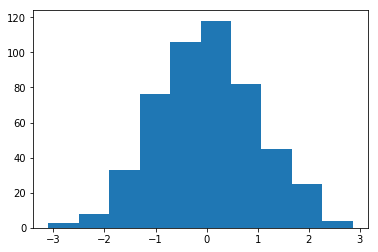

In [48]:
plt.hist(z_group['Age']) # obtendremos una campana de gauss ya que los datos fueron estandarizados

In [49]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [50]:
doble_group.transform(fill_na_mean) # solo en caso de que hubiera algun NaN

Height      Weight        Age        Income
0    145.167883   42.092263  36.951039  18989.387186
1    136.177980   72.180561  36.367544  15074.024903
2    171.845019   75.114444  34.493985  16405.108184
3    162.329529   85.971426  23.023385  14798.127571
4    124.124572   68.158784  21.623880  14314.824132
5    161.041421   67.711520   6.606398  18807.663412
6    144.838648   53.316556  27.695906  15800.697514
7    137.810894   99.634641  26.771101  20319.790500
8    132.905953   78.013713  26.201732  11883.964606
9    162.965276   67.874797  31.701715  20757.341717
10   161.163028   58.510633  25.554908  17593.129919
11   197.176592   85.583737  40.243759  22458.763438
12   178.876264  110.546685  29.575952  15738.373323
13   203.427140   29.906346  36.233283  18792.414590
14   100.523046   74.079748  35.838520  16488.833092
15   178.190435   17.824478  36.071389  18777.540727
16   176.278079   20.441128  50.043869  17232.650595
17   227.533584   42.662173  44.901800  17756.726468
18   183.367297   70.337292  41.946450  17891.975087
19   184.848672   70.450623  22.118481  19922.550811
20   189.111909   93.995178  24.624079  20864.387160
21   151.974122   71.755741  28.918174  22336.750558
22   118.043825   18.020905  21.025422  12874.735876
23   119.595846   36.506884  24.951311   9887.759388
24   180.433288   72.779211  44.746632  17611.334607
25   126.629573   78.165734  23.515833  19495.863450
26   138.483472   63.552211  37.726300  15018.159435
27   204.321009   99.089105  17.882201  16703.007533
28   170.064818   38.320510   7.528537  25006.033872
29   193.154937   81.622123  22.969791  14513.716520
..          ...         ...        ...           ...
470  187.691003   70.811391  49.424242  18273.677250
471  142.440937   68.506197  30.785359  18186.559773
472  159.874097  105.212692  51.404985  16734.769642
473  189.674362   36.167739  33.721053  19742.856979
474  197.805862   45.518892  22.554329  22163.226755
475  195.130477   47.707228  32.921643  16162.301280
476  166.530145   62.558070  22.811835  20132.124553
477   99.703730   60.896117  32.452274  18570.808234
478  139.988500   48.371234  33.580363  17689.964499
479  160.636243   92.694792  40.269310  17014.124012
480  195.562435   70.916748  37.641810  22324.566808
481  183.760028   86.619837  22.552925  18145.066839
482  172.896677   84.086825  51.017731  15018.589275
483  217.482947   11.193193  12.539880  18500.986646
484  176.531487   72.467958  13.396818  13767.440360
485  128.918064  111.387564  40.115668  22701.879412
486  171.330909   49.676584  18.330523  18668.077126
487  168.513569   37.952012  16.695156  18383.458136
488  132.543944  106.303145  56.240096  15011.014211
489  171.592185   90.712778  24.036057  19156.325725
490  151.655340   45.458009  49.630662  20478.823182
491  212.628749   88.504326  39.293652  12197.146834
492  122.871421   66.341540  56.827270  20250.180667
493  127.761334   15.953736  40.282035  10130.038265
494  192.415516   89.832325  32.098837   9444.620670
495  167.048706   48.636273  11.917965  15353.686122
496  189.911223  104.659743  14.268510  15724.386603
497  150.290738   84.272248  17.349343  20639.384132
498  177.038678   95.926685  23.351679  23562.370882
499  154.262309    0.331889  18.911735  21050.451589

[500 rows x 4 columns]

# Diversas Operaciones Utiles

In [58]:
doble_group.head(1) # devuelve la primera fila de cada grupo/coleccion. Notese que no devuelve nada con 0

Gender Economic Status      Height     Weight        Age        Income
0   Female            Rich  145.167883  42.092263  36.951039  18989.387186
1   Female            Poor  136.177980  72.180561  36.367544  15074.024903
4     Male            Poor  124.124572  68.158784  21.623880  14314.824132
5     Male            Rich  161.041421  67.711520   6.606398  18807.663412
8   Female    Middle Class  132.905953  78.013713  26.201732  11883.964606
13    Male    Middle Class  203.427140  29.906346  36.233283  18792.414590

In [59]:
doble_group.tail(1) # lo mismo que lo anterior, pero con tail v:

Gender Economic Status      Height      Weight        Age        Income
483    Male            Poor  217.482947   11.193193  12.539880  18500.986646
492  Female    Middle Class  122.871421   66.341540  56.827270  20250.180667
495  Female            Rich  167.048706   48.636273  11.917965  15353.686122
496    Male            Rich  189.911223  104.659743  14.268510  15724.386603
498  Female            Poor  177.038678   95.926685  23.351679  23562.370882
499    Male    Middle Class  154.262309    0.331889  18.911735  21050.451589

In [64]:
doble_group.nth(32) # devuelve el 32th elemento de cada grupo

Age      Height        Income      Weight
Gender Economic Status                                                 
Female Middle Class     35.101602  156.228007  17459.093650   26.522650
       Poor             53.261980  169.169975  19415.701329   57.177360
       Rich              8.270294  179.142372  21424.391692   43.574333
Male   Middle Class     29.361841  143.582259  18718.429985   74.616231
       Poor             44.837860  165.543379  13204.505170  105.179643
       Rich             33.283425  185.146810  15701.772805   45.732583

In [68]:
df_sorted = df.sort_values(["Age", "Income"])
df_sorted.head(10)

Gender Economic Status      Height      Weight       Age        Income
390  Female            Poor  134.265333   79.273627 -7.525030  19665.093150
381    Male    Middle Class  139.082098  131.846060 -6.412061  24282.652586
140  Female            Rich  151.537356   76.740189  0.202976  16605.355245
86     Male    Middle Class  152.739927   78.280217  1.009500  20008.465676
36   Female            Rich  178.688787   52.043785  1.576426  17248.978778
355  Female            Rich  183.693189   40.400648  4.218930  15624.814152
264  Female            Poor   94.961691   80.662536  4.336893  20639.053242
272    Male            Poor   90.685904  135.672345  5.212532   9343.630548
56   Female            Rich  177.586754   61.151855  5.854644  15922.056594
152    Male            Rich  178.868977   66.605312  6.255002  18892.517283

In [69]:
age_group = df_sorted.groupby('Gender')

In [73]:
age_group.head() # las agrupaciones (fem, masc) estan ordenadas de menor a mayor por edad

Gender Economic Status      Height      Weight       Age        Income
390  Female            Poor  134.265333   79.273627 -7.525030  19665.093150
381    Male    Middle Class  139.082098  131.846060 -6.412061  24282.652586
140  Female            Rich  151.537356   76.740189  0.202976  16605.355245
86     Male    Middle Class  152.739927   78.280217  1.009500  20008.465676
36   Female            Rich  178.688787   52.043785  1.576426  17248.978778
355  Female            Rich  183.693189   40.400648  4.218930  15624.814152
264  Female            Poor   94.961691   80.662536  4.336893  20639.053242
272    Male            Poor   90.685904  135.672345  5.212532   9343.630548
152    Male            Rich  178.868977   66.605312  6.255002  18892.517283
5      Male            Rich  161.041421   67.711520  6.606398  18807.663412

In [74]:
# hombre y mujer mas viejos
age_group.tail(1)

Gender Economic Status      Height     Weight        Age        Income
142    Male    Middle Class  154.848302  73.763205  61.820811  16031.758718
396  Female            Poor  156.566736  84.467871  66.346624  17447.241895

# Conjuntos de test y train

In [75]:
df = pd.read_csv('../../datasets/customer-churn-model/Customer Churn Model.txt')

In [76]:
len(df)

3333

## Dividir utilizando la distribucion normal

In [80]:
a = np.random.randn(len(df))

(array([  18.,   83.,  252.,  553.,  877.,  796.,  494.,  198.,   54.,    8.]),
 array([-3.36127549, -2.67459939, -1.98792328, -1.30124718, -0.61457108,
         0.07210503,  0.75878113,  1.44545723,  2.13213334,  2.81880944,
         3.50548555]),
 <a list of 10 Patch objects>)

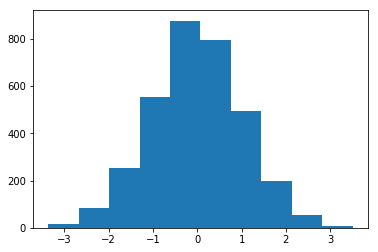

In [81]:
plt.hist(a)

In [82]:
check = (a < 0.8)

In [83]:
check

array([False,  True, False, ...,  True,  True,  True], dtype=bool)

(array([  712.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2621.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

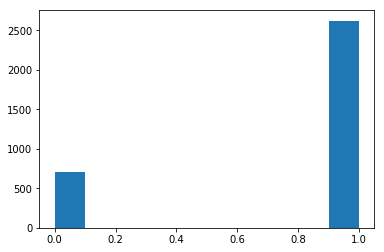

In [85]:
plt.hist(check) # el 80% de los datos estan representados en el histograma

In [95]:
train = df[check]
test = df[~check] # recordar que la tilde es el complemento

In [88]:
len(train) # 80%

2621

In [89]:
len(test) # 20%

712

# Con libreria sklearn

In [96]:
train, test = train_test_split(df, test_size=0.2)

In [97]:
len(train)

2666

In [98]:
len(test)

667

## Usando una funcion de shuffle

In [101]:
# definir una semilla de aleatoriedad para poder reproducir las pruebas / conjuntos / etc
df.head() # esto esta ordenadito, habra que desordenarlo v:

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  Churn?  
0         2.70               1  False.  
1         3.70               1  False.  
2         3.29               0  False.  
3         1.78               2  False.  
4         2.73               3  False.  

[5 rows x 21 columns]

In [104]:
df = sklearn.utils.shuffle(df)

In [105]:
cut_id = int(0.75 * len(df))
train_df = df[:cut_id]
test_df = df[cut_id:]

In [106]:
len(train_df)

2499

In [107]:
len(test_df)

834